In [1]:
!pip install --upgrade pip
!pip install imutils
!pip install opencv-python

  Attempting uninstall: pip
    Found existing installation: pip 20.2.4
    Uninstalling pip-20.2.4:
      Successfully uninstalled pip-20.2.4


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\Victor\\AppData\\Local\\Temp\\pip-uninstall-6058j9dq\\pip.exe'
Consider using the `--user` option or check the permissions.



  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25862 sha256=65a56ef9a3d9cbae965e175eb21dc29a94d88bc7b5be6a0ef14e85d69601b0ae
  Stored in directory: c:\users\victor\appdata\local\pip\cache\wheels\59\1b\52\0dea905f8278d5514dc4d0be5e251967f8681670cadd3dca89
Successfully built imutils


In [74]:
#задание
#https://courses.openedu.ru/courses/course-v1:ITMOUniversity+ADVMLEN+spring_2021_ITMO/courseware/a1d304884d7e47928557b17a24b2c58d/ad43a8f5cb1245b4867edcb5c20aa454/?child=first

In [70]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from IPython.display import Image
from imutils import paths
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [21]:
imagePaths = sorted(list(paths.list_images(r'C:\Users\Victor\Downloads\train')))
data = []
labels = []

for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath, 1)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
    hist = extract_histogram(image)
    data.append(hist)
    labels.append(label)

In [56]:
type(imagePaths)

list

0


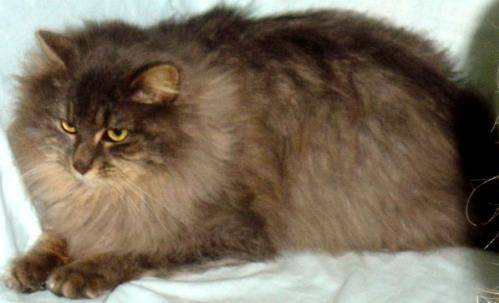

In [25]:
le = LabelEncoder()
labels = le.fit_transform(labels)
print(labels[45])
Image(filename=imagePaths[45])

In [29]:
trainData, testData, trainLabels, testLabels = train_test_split(np.array(data), labels, test_size=0.25, random_state=4)

In [30]:
model = LinearSVC(random_state = 4, C = 1.47)
model.fit(trainData, trainLabels)

LinearSVC(C=1.47, random_state=4)

In [44]:
tetha = [152, 66, 123]
for coef in tetha:
    print("{0}\t{1:.2f}".format(coef, model.coef_[0][coef]))

152	-0.04
66	-1.03
123	0.00


In [55]:
predictions = model.predict(testData)
print("F1_score\t{0:.3f}".format(f1_score(testLabels, predictions, average='macro')))

F1_score	0.562


cat.1020.jpg 	 [0]


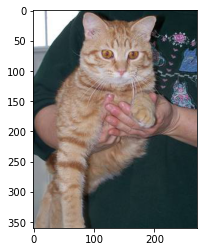

cat.1010.jpg 	 [0]


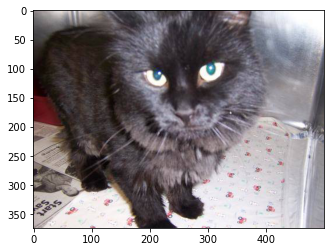

dog.1046.jpg 	 [1]


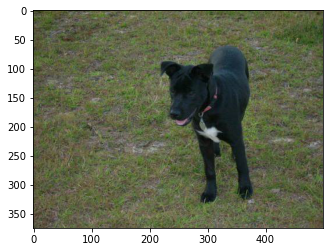

dog.1013.jpg 	 [1]


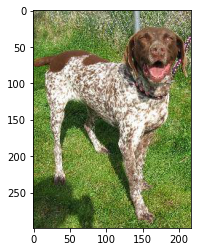

In [73]:
test_list = ['cat.1020.jpg', 'cat.1010.jpg', 'dog.1046.jpg', 'dog.1013.jpg']
for image in test_list:
    path = r'C:\Users\Victor\Downloads\test\{0}'.format(image)
    singleImage = cv2.imread(path)
    histt = extract_histogram(singleImage)
    histt2 = histt.reshape(1, -1)
    prediction = model.predict(histt2)
    print(image, "\t", prediction)
    img = mpimg.imread(path)
    plt.imshow(img)
    plt.show()